# Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.cluster import KMeans

In [4]:
dataf = pd.read_csv("Mall_Customers.csv")
dataf.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
dataf.shape
dataf.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
dataf.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#cleaning the data
dataf.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

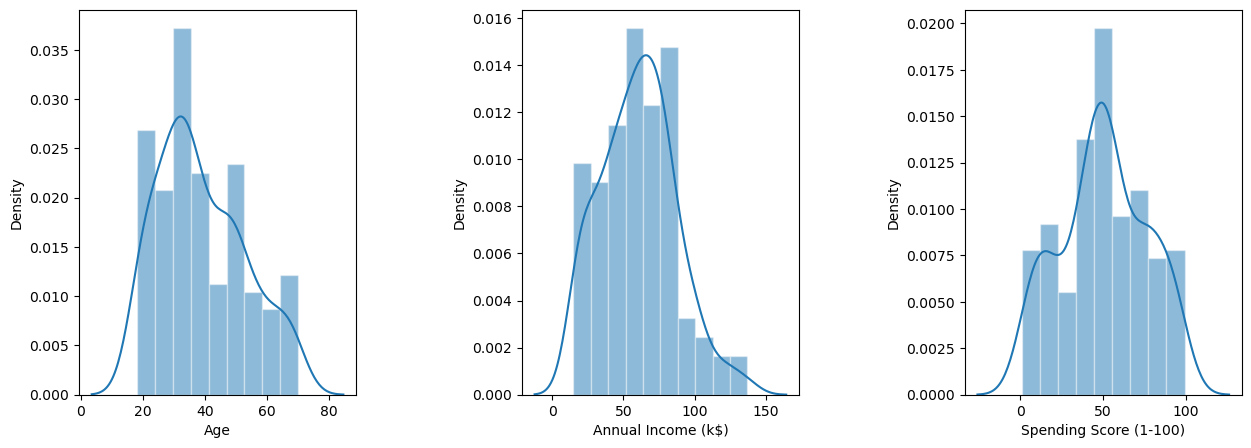

In [8]:
plt.figure(figsize = (15, 5))
n = 0 
for i in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.2, wspace = 0.6)
    sns.histplot(dataf[i], kde = True, stat = "density", kde_kws = dict(cut = 3), edgecolor = (1, 1, 1, 0.4))
plt.show()

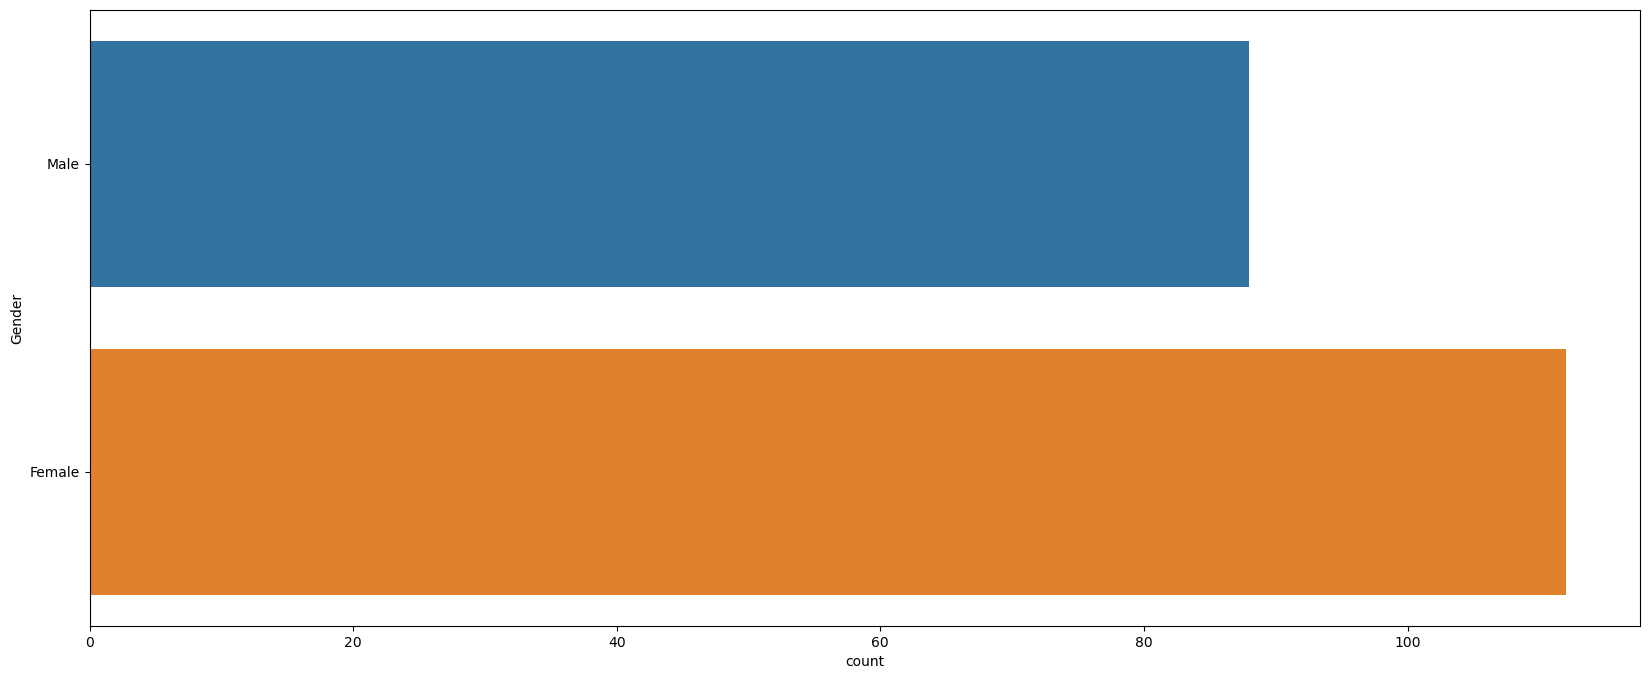

In [9]:
plt.figure(figsize = (20,8))
# sns.barplot(x = "Age", y="Gender", data=dataf)
sns.countplot(y="Gender", data=dataf)
plt.show()

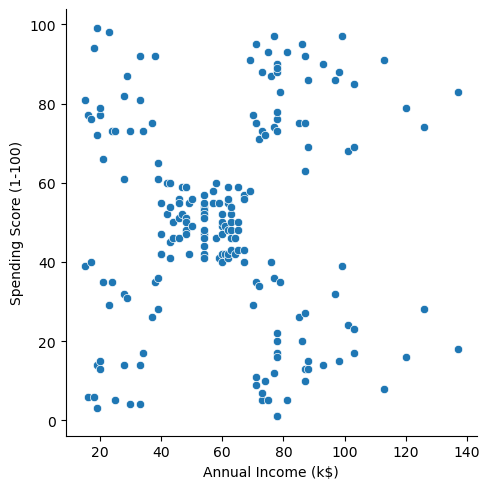

In [10]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=dataf)

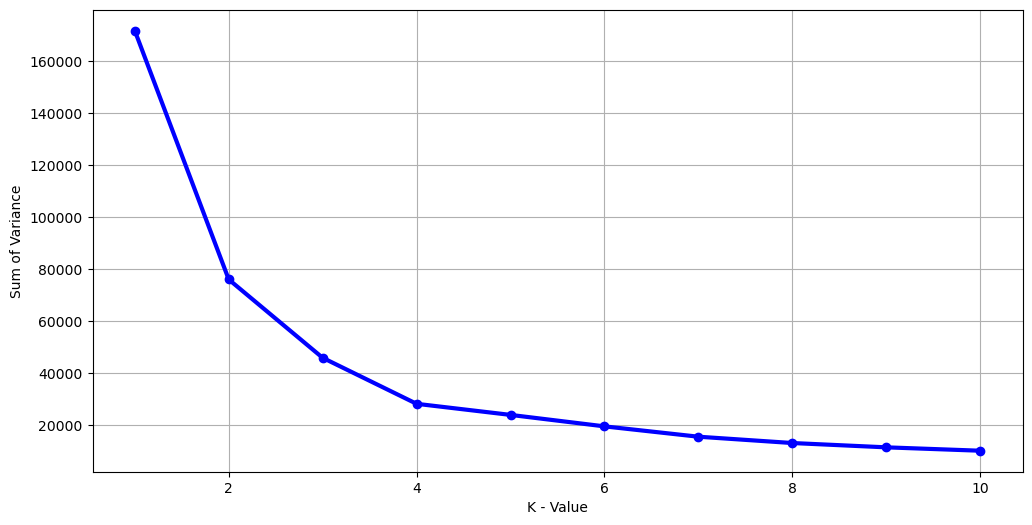

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X1 = dataf.loc[:, ["Age", "Spending Score (1-100)"]].values
sumvar = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10)
    kmeans.fit(X1)
    sumvar.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), sumvar, linewidth=3, color="blue", marker='o')
plt.xlabel("K - Value")
plt.ylabel("Sum of Variance")
plt.show()

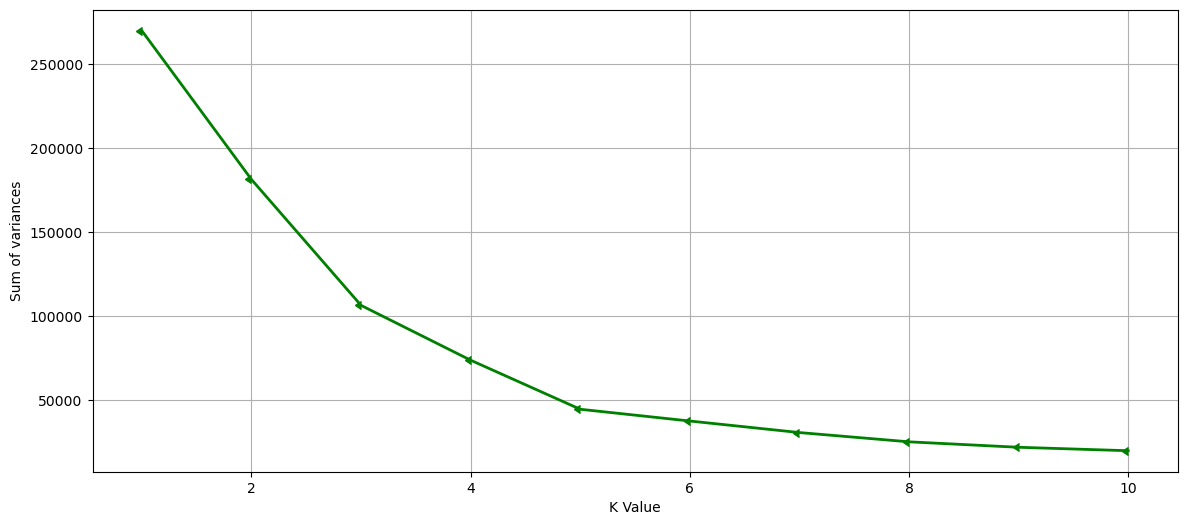

In [12]:
X2 = dataf.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values
sumvar = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "k-means++", n_init = 10)
    kmeans.fit(X2)
    sumvar.append(kmeans.inertia_)
    
plt.figure(figsize=(14, 6))
plt.grid()
plt.plot(range(1, 11), sumvar, linewidth = 2, color = "green", marker=8)
plt.xlabel("K Value")
plt.ylabel("Sum of variances")
plt.show()

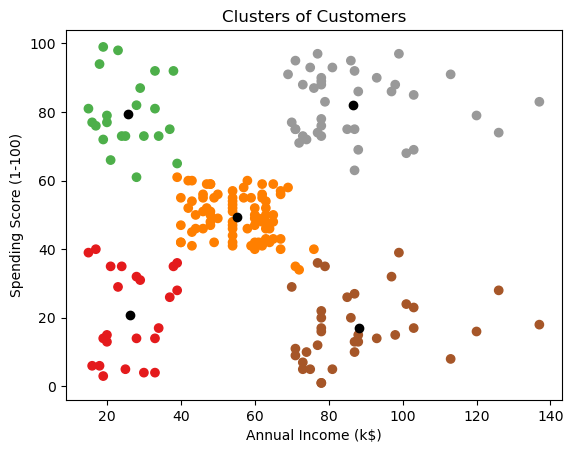

In [18]:
kmeans = KMeans(n_clusters = 5, n_init = 10)
label = kmeans.fit_predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c = kmeans.labels_, cmap = "Set1")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "black")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [24]:
# surv = dataf.groupby('AgeGroup')['Survived'].mean()
# dataf['AgeGroup'] = pd.cut(dataf['Age'], bins = [0, 18, 30, 50, 100], labels = ['Child', 'Young Adult', 'Adult', 'Senior'])
# plt.bar(surv.index, surv.values,color="gold")
# plt.xlabel('Age Group')
# plt.ylabel('Survival Rate')
# plt.title('Survival Rate by Age Group')
# plt.show()